# COGS 108 - How Important Is Your Degree?

# Names

- Sehee Kim
- Rayyan Khalid
- Andrey Kondratyuk
- Saeji Tyler Hong
- Yixuan Li

# Abstract

Undergraduate college students feel the desperate need to apply to graduate school in order to earn their degree, increasing their chances of securing a full time job with a desired pay. Especially in regards to the increase in housing after the pandemic and lay-offs in high technology companies, a satisfactory pay is crucial to obtain a comfortable living standard. However, our group seeks out the question of *is the relationship between the level of educational degree and income in the U.S. significant even after regarding the external factors such as race, gender, and age?* Are there other factors as crucial as a degree that can obtain financial security? After cleaning and analyzing the couple datasets, we found a statistical significance between the level of educational degree and income despite the contribution of race, age, and gender.

# Research Question

Is the relationship between the level of educational degree and income in the U.S. significant even after regarding the external factors such as race, gender, and age?



## Background and Prior Work

The interplay between education and economic outcomes has been extensively studied, underscoring the value of education as a determinant of earnings. In the 1970s, Jacob Mincer established a model demonstrating that educational attainment and work experience are pivotal in predicting income levels. This foundational model has been crucial for subsequent research into human capital and wages, highlighting education's role in shaping economic prospects.

However, the influence of education on earnings is not singular nor the most decisive across all demographics. Recent studies have begun to compare the relative impact of educational degrees with other factors such as work experience, race, and sex on an individual's income in the U.S. For example, disparities in earnings that arise from racial and gender differences have been observed even when educational attainment is controlled for, suggesting that while education is a significant factor, it is part of a complex interplay of variables influencing economic success.

The nuanced understanding of education's economic return has been further elaborated in discussions by scholars and in platforms such as the World Bank Blogs, which examine the varying economic returns on education across different countries and demographic groups. These explorations underscore that education's value cannot be fully understood without considering the intersectionality of race and sex, which can both independently and collectively affect income.

The comprehensive analysis by Anna Bernasek in The New York Times provides insight into the American education system's economic landscape. Bernasek's work points to the multifaceted nature of education's economic benefits and the challenges of measuring its impact due to intersecting factors such as race and sex, alongside the direct economic outcomes like income and productivity. Furthermore, she emphasizes that societal impacts, such as civic understanding and the generation of innovative ideas, are also essential dimensions of education's value, which may interact with these factors in complex ways.

As this body of research evolves, it is becoming increasingly clear that to fully understand the determinants of income in the U.S., a comprehensive approach that considers educational degrees in conjunction with work experience, race, and sex is essential. This perspective is crucial for policymakers and educators aiming to leverage education as a tool for economic empowerment across diverse contexts.

<a name="cite_note-1"></a>1. [^](#cite_ref-1) Mincer, J. (1974). *Schooling, Experience, and Earnings*. National Bureau of Economic Research.

<a name="cite_note-2"></a>2. [^](#cite_ref-2) World Bank Blogs. [50 Years After Landmark Study, Returns to Education Remain Strong](https://blogs.worldbank.org/education/50-years-after-landmark-study-returns-education-remain-strong).

<a name="cite_note-3"></a>3. [^](#cite_ref-3) Bernasek, A. (2005, December 11). *What's the Return on Education?* The New York Times. [https://www.nytimes.com/2005/12/11/business/yourmoney/whats-the-return-on-education.html](https://www.nytimes.com/2005/12/11/business/yourmoney/whats-the-return-on-education.html).

# Hypothesis



The level of educational degree is still significant with individual’s wage, the higher the degree the higher the wage. Other external factors do have an influence on income, but the knowledge an individual gains from the degree is the most valuable in the working industry.

# Data

## Setup

In [1]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest, chi2_contingency
import patsy
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data overview

For each dataset include the following information
  - Dataset Name: **cps18.csv**
  - Link to the dataset: **on github**
  - Number of observations: **19128**
  - Number of variables: **12**

The important variables in the cps18.csv are age, male (male or not male), incwage (income or wages of the person), hrs_per_wk (number of weekly working hours), wkswork (number of weeks of work annually), and the eds degree columns (education degree specified achieved or not) showing the education degrees. With this dataset, there are both quantitative and categorical data types in the data. Required cleaning consists of converting categorical data into numerical for our analysis, ensuring they are easily for code manipulation.

## cps18.csv

We will first load in the necessary dataset containing values describing each person alone with their education level and salary.

In [2]:
# load in the dataset
df = pd.read_csv('cps18.csv')
df

,age,male,race,hrs_per_wk,wkswork,incwage,ed_lt_hs,ed_some_hs,ed_hs_degree,ed_some_col,ed_ba_degree,ed_post_degree
0,48,1,white,NaN,49,1200.0,0,0,0,1,0,0
1,55,0,white,40.0,52,56000.0,0,0,0,0,0,1
2,52,1,white,NaN,52,0.0,1,0,0,0,0,0
3,55,0,white,NaN,52,0.0,1,0,0,0,0,0
4,58,0,white,20.0,52,5000.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91923,42,1,asian/pacific,84.0,52,0.0,0,0,0,0,1,0
91924,56,1,asian/pacific,0.0,0,0.0,0,0,0,1,0,0
91925,36,0,asian/pacific,40.0,52,24000.0,0,0,0,1,0,0
91926,32,0,asian/pacific,56.0,52,24000.0,0,0,0,1,0,0


Below is the description of each of the column names in the dataset.

| Column Name    | Description                                   |
|----------------|-----------------------------------------------|
| age            | Age of the person                             |
| male           | Gender where 1 is male and 0 is female        |
| race           | Race of the person                            |
| hrs_per_wk     | Hours per week person worked                  |
| wkswork        | Weeks person works annually                   |
| incwage        | Income wage of person                         |
| ed_lt_hs       | Educational less than high school level       |
| ed_some_hs     | Education of some high school level           |
| ed_hs_degree   | High school degree education level            |
| ed_some_col    | Some college level education                  |
| ed_ba_degree   | Bachelor's degree                             |
| ed_post_degree | Graduate school education level               |

We see the column names printed out above. Age refers to the numerical age of the person. Column 'male' has value 1 if the person is male and 0 if female (and there are no other values). Race is a categorical variable describing the race group and background of the person. "hrs_per_wk" is the column describing how many hours the person works in a week and "wkswork" describes how many weeks the person works in a year. "incwage" is the salary rate the person gets paid. The rest of the columns, those that start with "ed" shows the level of education the person has completed and is one-hot encoded.

## Data Cleaning

We will check if the educational columns are indeed one-hot encoded, meaning that each data observation row has a 1 in one of the 6 educational columns and 0 in the other five. This is important for data analysis as we want to make sure everything is consistently and logically labeled. For example, it would not make sense for a person to have both some high school education and less than high school education when other some high school education people have just some high school education marked in the columns.

In [3]:
one_hot_columns = ['ed_lt_hs', 'ed_some_hs', 'ed_hs_degree', 'ed_some_col', 'ed_ba_degree', 'ed_post_degree']
condition = (df[one_hot_columns].sum(axis=1) != 1) # check to see only one of them is 1 and the rest are 0
df[condition].empty # True means all columns are correctly one-hot encoded

True

We will binary-ize the educational degrees data: "lower" education made up of less than high school, some high school, and high school degrees; "upper education made up of some college, bachelors, and graduate/post degrees. Essentially, a value of '0' would refer to people with a maximum education of high school graduate or less and a value '1' would refer to people with minimum college level education. 

This initial testing tests if more educational years is correlated with higher income wage. We binary-ized it to make testing easier.

In [4]:
# sepearate into lower education degrees (first three) and higher education degrees (last three)
# new column will have 0 for lower education degrees and 1 for higher education degrees
df['higher_ed'] = df['ed_some_col'] | df['ed_ba_degree'] | df['ed_post_degree']
df

,age,male,race,hrs_per_wk,wkswork,incwage,ed_lt_hs,ed_some_hs,ed_hs_degree,ed_some_col,ed_ba_degree,ed_post_degree,higher_ed
0,48,1,white,NaN,49,1200.0,0,0,0,1,0,0,1
1,55,0,white,40.0,52,56000.0,0,0,0,0,0,1,1
2,52,1,white,NaN,52,0.0,1,0,0,0,0,0,0
3,55,0,white,NaN,52,0.0,1,0,0,0,0,0,0
4,58,0,white,20.0,52,5000.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91923,42,1,asian/pacific,84.0,52,0.0,0,0,0,0,1,0,1
91924,56,1,asian/pacific,0.0,0,0.0,0,0,0,1,0,0,1
91925,36,0,asian/pacific,40.0,52,24000.0,0,0,0,1,0,0,1
91926,32,0,asian/pacific,56.0,52,24000.0,0,0,0,1,0,0,1


Due to the fact some results are missing or incoherent in hrs_per_wk and wkswork columns, we will procede to delete them. We will utilize other variables to fill in for the missing information here.

In [5]:
df = df.drop(columns=['hrs_per_wk', 'wkswork']) # delete these columns
df

,age,male,race,incwage,ed_lt_hs,ed_some_hs,ed_hs_degree,ed_some_col,ed_ba_degree,ed_post_degree,higher_ed
0,48,1,white,1200.0,0,0,0,1,0,0,1
1,55,0,white,56000.0,0,0,0,0,0,1,1
2,52,1,white,0.0,1,0,0,0,0,0,0
3,55,0,white,0.0,1,0,0,0,0,0,0
4,58,0,white,5000.0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
91923,42,1,asian/pacific,0.0,0,0,0,0,1,0,1
91924,56,1,asian/pacific,0.0,0,0,0,1,0,0,1
91925,36,0,asian/pacific,24000.0,0,0,0,1,0,0,1
91926,32,0,asian/pacific,24000.0,0,0,0,1,0,0,1


We also need a one-hot encoded version of the race, which is a categorical variable. This will help with the future regression analysis.

We add it into our data table for use.

In [6]:
race_dummies = pd.get_dummies(df['race'], prefix='race')
df = pd.concat([df, race_dummies], axis=1)
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)
df

,age,male,race,incwage,ed_lt_hs,ed_some_hs,ed_hs_degree,ed_some_col,ed_ba_degree,ed_post_degree,higher_ed,race_asian/pacific,race_black,race_multiple/other,race_native,race_white
0,48,1,white,1200.0,0,0,0,1,0,0,1,0,0,0,0,1
1,55,0,white,56000.0,0,0,0,0,0,1,1,0,0,0,0,1
2,52,1,white,0.0,1,0,0,0,0,0,0,0,0,0,0,1
3,55,0,white,0.0,1,0,0,0,0,0,0,0,0,0,0,1
4,58,0,white,5000.0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91923,42,1,asian/pacific,0.0,0,0,0,0,1,0,1,1,0,0,0,0
91924,56,1,asian/pacific,0.0,0,0,0,1,0,0,1,1,0,0,0,0
91925,36,0,asian/pacific,24000.0,0,0,0,1,0,0,1,1,0,0,0,0
91926,32,0,asian/pacific,24000.0,0,0,0,1,0,0,1,1,0,0,0,0


Now, our data is cleaned and ready to use for further analysis and visualization.

# Results

## Exploratory Data Analysis and Visualization

We will first plot a histogram of people's income wages in the dataset to see what the overall distribution is like.

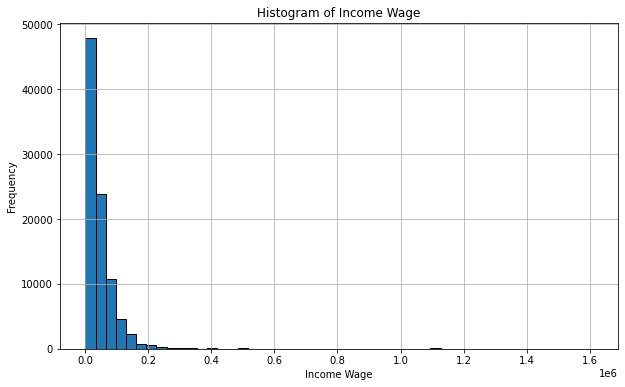

In [7]:
# Plot histogram to visualize wages of all the people in the dataset
plt.figure(figsize=(10, 6))
plt.hist(df['incwage'], bins=50, edgecolor='k')
plt.title('Histogram of Income Wage')
plt.xlabel('Income Wage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We note that there are quite a few outliers, mostly those that have incredibly large wages compared to the rest of the people in the dataset, which is quite consistent with the understanding of the distriubtion of people's incomes throughout the world. However, we may want to see the distribution more clearly where there are many more data points.

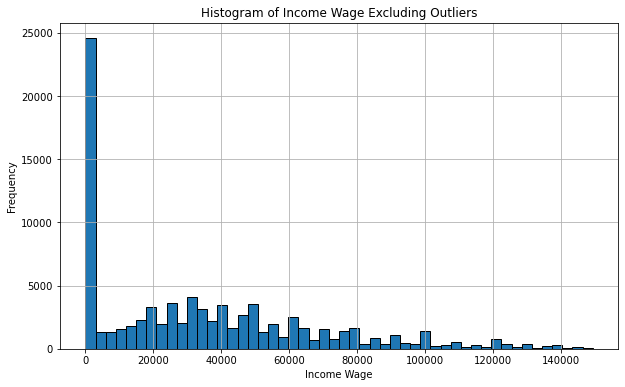

In [8]:
# Calculate Q1, Q3, and IQR
Q1 = df['incwage'].quantile(0.25)
Q3 = df['incwage'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
filtered_df = df[(df['incwage'] > (Q1 - 1.5 * IQR)) & (df['incwage'] < (Q3 + 1.5 * IQR))]

# Plot histogram without outliers
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['incwage'], bins=50, edgecolor='k')
plt.title('Histogram of Income Wage Excluding Outliers')
plt.xlabel('Income Wage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

As shown above, there seems to be excessively a lot of data points in the lowest bin in the histogram. The wage with the highest frequency bar seems to be the one of the lowest wages. This refers to a plethora of participants that may still be unemployed, which makes sense if they have recently graduated and have not secured a job yet.

Next, we will see the average income wages for each level of education in the dataset.

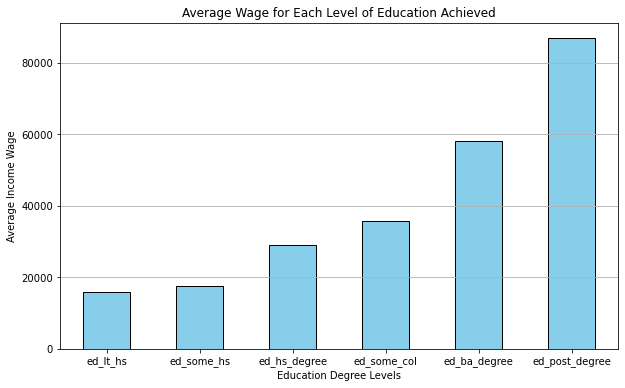

In [9]:
# Get the average income in the dataset for each education level
# Store result in a dictionary to use for bar graph
average_inc_wage = {}
for col in one_hot_columns:
    average = df[df[col] == 1]['incwage'].mean()
    average_inc_wage[col] = average

# Convert dictionary into pandas DataFrame to use in graph
average_inc_wage_series = pd.Series(average_inc_wage)

# Graph the average income wage for each educational level
plt.figure(figsize=(10, 6))
average_inc_wage_series.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Wage for Each Level of Education Achieved')
plt.xlabel('Education Degree Levels')
plt.ylabel('Average Income Wage')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

The graph indicates a correlation between education degree achieved and average wage of the people who have achieved that degree. The categorical variable is shown in increasing order of educational degree levels, from less than high school to post bachelor's degree, and we see that the average income wage is monotonically increasing over it. This suggests the correlation between education degree and average income wage.

Now that we proved that the level of an education degree does impact average income wage, we will determine if other factors contribute to this relationship as well. We will compare race, age, and gender with income, and if there are any discrepancies -- an evident contrast - we can first conclude that an external factor can effect one's wage. Then, we can procede to see if its effect is siginificant enough to skew the direct correlation between education degree and average income wage.

First, we will see the average income wage for each race category in the dataset. This determines if there is discrepancies on income wages across different races.

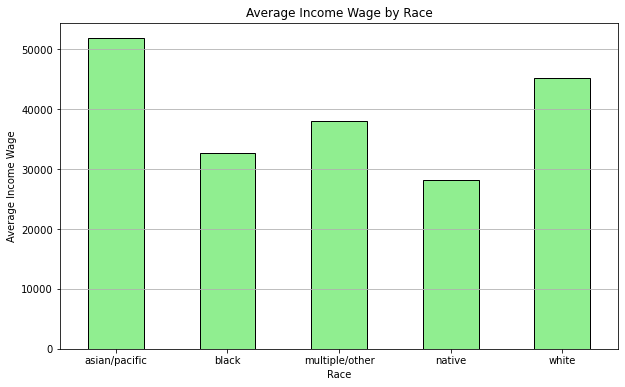

In [10]:
# Plot the average wage of people by race
average_incwage_by_race = df.groupby('race')['incwage'].mean()

plt.figure(figsize=(10, 6))
average_incwage_by_race.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Average Income Wage by Race')
plt.xlabel('Race')
plt.ylabel('Average Income Wage')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

This suggests that there are some discrepancies between the races in terms of average income wage. We will need to account for this when doing the data analysis in the future, to determine if different racial compositions of people who have gotten certain education levels is the real cause of the correlation between education levels and average income.

Next we will examine the average income wages across different ages.

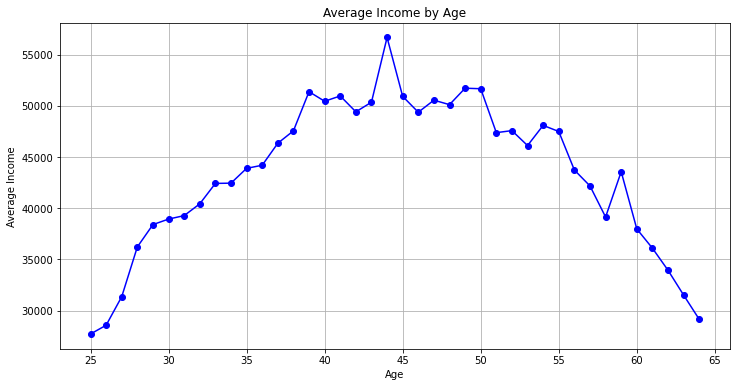

In [11]:
# Plot the average incomes of people by age (with age range of +-0 of each point)
interval = 0
unique_ages = sorted(df['age'].unique())
avg_income_by_age_range = []

for age in range(min(unique_ages), max(unique_ages) + 1):
    mask = (df['age'] >= age - interval) & (df['age'] <= age + interval)
    avg_income = df.loc[mask, 'incwage'].mean()
    avg_income_by_age_range.append(avg_income)
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(min(unique_ages), max(unique_ages) + 1), avg_income_by_age_range, marker='o', linestyle='-', color='blue')
plt.title('Average Income by Age')
plt.xlabel('Age')
plt.ylabel('Average Income')
plt.grid(True)
plt.show()

The average income wage for each age is different and follows a quandratic, parabolic distribution. There is a correlation between age and average income wage which means we will also have to account for this in future analysis as there may be more people in a certain age group (eg. 40 to 50) who received a certain education level that may skew the average income for different education levels.

And finally, we will examine the average income wages by gender, the last other variable that may affect the average income levels.

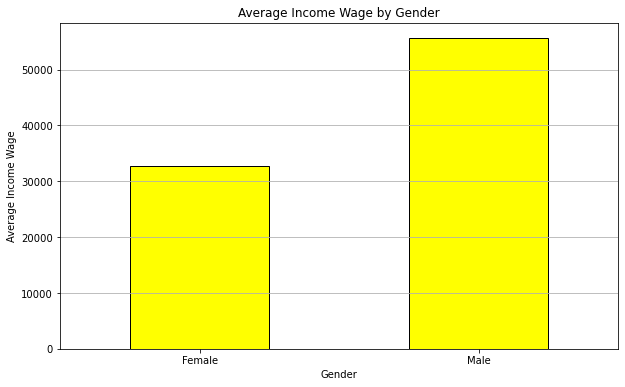

In [12]:
# Plot the average wage by gender to see if there is a difference
average_incwage_by_gender = df.groupby('male')['incwage'].mean()
average_incwage_by_gender.index = ['Female', 'Male']

plt.figure(figsize=(10, 6))
average_incwage_by_gender.plot(kind='bar', color='yellow', edgecolor='black')
plt.title('Average Income Wage by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Income Wage')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

We see there is a clear discrepancy in average income wage between the genders as shown in the graph above. Now, we will test if these differences are all statistically significant enough to account for in the analysis of the average income wage with educational levels.

## Data Analysis: Linear Model Significance (Gender)

We will do a T-test to see if there is a significant difference in income wage based on higher or lower education degree. 

We have seen in the EDA that, visually, there seems to be a much higher average income wage for people with the higher education than not, and will see if this was statistically significant.

In [13]:
# Save the income data for all higher education degree and lower education degree people
inc_lo = df[df['higher_ed'] == 0]['incwage']
inc_hi = df[df['higher_ed'] == 1]['incwage']

# Calculate the average income for higher and lower education degree people
avg_inc_lo = inc_lo.mean()
avg_inc_hi = inc_hi.mean()

# use ttest_ind function to do a t-test on average income wage 
t_val, p_val = ttest_ind(inc_lo, inc_hi)
t_val, p_val

(-64.00171082743836, 0.0)

In [14]:
if p_val < 0.01:
    print('There is a significant difference in wages between lesser education and higher education people!')
else:
    print('There is NOT a significant difference!')

There is a significant difference in wages between lesser education and higher education people!


Although this T-test shows that there is a significant difference in income, we are not done yet. We should try some other confounding variables as they may be of worry.

We will look at gender first as there have been numerous studies showing gender inequalities between men and women and in the EDA, visually, there seemed to be discrepancies in the average income wage between men and women.

In [15]:
# look at the gender ratios of both higher and lower education degree achieved people
g_inc_lo = df[df['higher_ed'] == 0]['male'].value_counts()
g_inc_hi = df[df['higher_ed'] == 1]['male'].value_counts()

# get the male ratios
r_inc_lo = g_inc_lo[0] / (g_inc_lo[0] + g_inc_lo[1])
r_inc_hi = g_inc_hi[0] / (g_inc_hi[0] + g_inc_hi[1])

r_inc_lo, r_inc_hi

(0.4799613571825873, 0.5468157662414097)

In [16]:
chisq, p_val_chi = stats.chisquare(np.array([g_inc_lo.values, g_inc_hi.values]), axis=None)

if p_val_chi < 0.01:
    print('There is a significant difference in ratios!')

There is a significant difference in ratios!


The chi squared test shows that there is a statistically significant difference in the ratio of men between the two groups with there being more men in the higher education count, which is the category that our hypothesis would suggest that has the higher average income wage. Therefore, we would need to account for this discrepancy in male ratios.

In [17]:
# show the charts of average income for higher_ed and male combo
pv = df.pivot_table(values='incwage', index=['higher_ed', 'male'])
pv

incwage
higher_ed male              
0         0     16792.008173
          1     34104.810516
1         0     41084.785210
          1     70237.167189

We see in the above table that there is evidence that the higher_ed column does have an affect on the incwage column as we see based on the different values of higher_ed and male values, we have higher incwage for higher_ed = 1 males than with higher_ed = 0 males, and higher_ed = 1 females have higher incwage than higher_ed = 0 females.

We will try fitting a ordinary least squares linear model on both **higher_ed with incwage and high_ed** AND **male columns with incwage**. This determines if higher_ed could be used to significantly predict income wage. If successful, it suggests there is a signficiant correlation between higher education and income.

In [18]:
# fit a linear model on the data
outcome_1, predictors_1 = patsy.dmatrices('incwage ~ higher_ed', data=df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

p_values = res_1.pvalues
lm_1 = bool(p_values[1] < 0.01) # if True, there is linear correlation between higher_ed and income wage
lm_1

True

In [19]:
outcome_2, predictors_2 = patsy.dmatrices('incwage ~ higher_ed + male', data=df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

lm_2 = bool(res_2.pvalues[1] < 0.01) # if answer is true, higher_ed does significantly predict income wage
lm_2

True

Both came to the conclusion that higher_ed is a significant predictor of incwage, with and without the male column using an alpha significance level of 0.01. This suggests higher_ed is indeed a significant predictor of incwage when into account the discrepancy in gender ratios.

## Data Analysis: Linear Model Significance (Age)

Since we already concluded a significant difference in the average income of people with higher_ed compared to those without, we will next see if there is a signficant difference in the ages between the two groups. We will approach this with a T-test.

In [20]:
# Calculate the average age for higher and lower education degree people
age_lo = df[df['higher_ed'] == 0]['age']
age_hi = df[df['higher_ed'] == 1]['age']
avg_age_lo = age_lo.mean()
avg_age_hi = age_hi.mean()

# use ttest_ind function to do a t-test on average age 
t_val, p_val = ttest_ind(age_lo, age_hi)
t_val, p_val

(18.79765368155733, 1.1096218614820434e-78)

In [21]:
if p_val < 0.01:
    print('There is a significant difference in ages between lesser education and higher education people!')
else:
    print('There is NOT a significant difference!')

There is a significant difference in ages between lesser education and higher education people!


The T-test shows that there is a significant difference between the average ages of people with higher_ed and those without. This represents we have to take this into account if having higer_ed really is a significant predictor of income wage. Similarly to accounting for differing gender ratios, we will account for the differing average ages. 

We will use square root of age here as, like we have seen in the EDA, the age variable seems to have a quadratic relationship with income wage so we would fit a linear model on the square root of it. 

We will run the OLS linear model test to see if we get the result: higher_ed does significantly predict income wage.

In [22]:
outcome_4, predictors_4 = patsy.dmatrices('incwage ~ higher_ed + np.sqrt(age)', data=df)
mod_4 = sm.OLS(outcome_4, predictors_4)
res_4 = mod_4.fit()

lm_4 = bool(res_4.pvalues[1] < 0.01) # if answer is true, higher_ed does significantly predict income wage
lm_4

True

Both came to the conclusion that higher_ed is a significant predictor of incwage, with and without the age factoring in using an alpha significance level of 0.01. This suggests that higher_ed is indeed a significant predictor of incwage even when taking into account the discrepancy in average ages between the groups (albeit an absolute small one).

## Data Analysis: Linear Model Significance (Race)

Finally, we will determine if there is a signficant difference in the racial decomposition between the two groups. We will use a chi-squared test of independence to see if the distribution of the racial decomposition of the two groups are similar or not.

In [23]:
contingency_table = pd.crosstab(df['higher_ed'], df['race'])
contingency_table

race,asian/pacific,black,multiple/other,native,white
higher_ed,,,,,
0,1823,4841,697,774,26024
1,5016,6458,1092,681,44522


In [24]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
significance = bool(p_value < 0.05)
significance

True

This suggests there is a statistically significant difference in the racial composition of the two groups. Therefore, we will need to run the OLS test to account for these to see if education level has a significant impact on income wage.

In [25]:
outcome_5, predictors_5 = patsy.dmatrices('incwage ~ higher_ed + Q("race_asian/pacific") + Q("race_black") + Q("race_multiple/other") + Q("race_native") + Q("race_white")', data=df)
mod_5 = sm.OLS(outcome_5, predictors_5)
res_5 = mod_5.fit()

lm_5 = bool(res_5.pvalues[1] < 0.01)  # if answer is true, higher_ed does significantly predict income wage
lm_5

True

Both came to the conclusion that higher_ed is a significant predictor of incwage, with and without the racial decompositions factoring in using an alpha significance level of 0.01. This suggests that higher_ed is indeed a significant predictor of incwage even when taking into account the discrepancy in the racial makeup between the groups.

## Data Analysis: Putting It All Together

In [26]:
outcome_6, predictors_6 = patsy.dmatrices('incwage ~ higher_ed + male + np.sqrt(age) + Q("race_asian/pacific") + Q("race_black") + Q("race_multiple/other") + Q("race_native") + Q("race_white")', data=df)
mod_6 = sm.OLS(outcome_6, predictors_6)
res_6 = mod_6.fit()
print(res_6.summary())

lm_6 = bool(res_6.pvalues[1] < 0.01) # if answer is true, higher_ed does significantly predict income wage
lm_6

                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1159.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:07:33   Log-Likelihood:            -1.1477e+06
No. Observations:               91928   AIC:                         2.295e+06
Df Residuals:                   91920   BIC:                         2.295e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

True

From the coefficients above, one can conclude that whether or not a person had a higher_ed, it still is the MOST significant factor in its effect on income wage (being a male follows up after).

*Experimental*: Out of curiosity, we can see the varying degrees of effect on income wage each individual education degree has by instead of using "higher_ed", we can fit an OLS model using the one-hot encoded educational level columns. If higher levels of education achieved were to be correlated with rising average income wages, each successive education level should have a greater coefficient weight in the OLS model after fitting.

In [27]:
outcome_7, predictors_7 = patsy.dmatrices('incwage ~ ed_lt_hs + ed_some_hs + ed_hs_degree + ed_some_col + ed_ba_degree + ed_post_degree + male + np.sqrt(age) + Q("race_asian/pacific") + Q("race_black") + Q("race_multiple/other") + Q("race_native") + Q("race_white")', data=df)
mod_7 = sm.OLS(outcome_7, predictors_7)
res_7 = mod_7.fit()
print(res_7.summary())
lm_7 = bool(res_7.pvalues[1] < 0.01) # if answer is true, higher_ed does significantly predict income wage
lm_7


                            OLS Regression Results                            
Dep. Variable:                incwage   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     1299.
Date:                Thu, 21 Mar 2024   Prob (F-statistic):               0.00
Time:                        00:07:35   Log-Likelihood:            -1.1449e+06
No. Observations:               91928   AIC:                         2.290e+06
Df Residuals:                   91916   BIC:                         2.290e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

True

The coefficient does increase by the degree, further contributing to our hypothesis that the level of degree does impact one's average wage in the U.S. 

# Ethics & Privacy

There are certain privacy and ethics considerations that we will have to take into account for our project. Given that we plan to examine income levels, there is a risk of exposing sensitive financial information. To mitigate this, we commit to anonymizing the data, replacing personally identifiable information with unique identifiers to safeguard the privacy of participants. Moreover, we recognize the importance of exploring potential biases in our dataset. There could be biases related to the demographics of the sample, potentially excluding certain populations and impacting the equitable analysis of our findings. To address this, we will conduct thorough exploratory data analysis to identify any disparities in representation. During the analysis phase, we will implement appropriate statistical techniques to control for biases and ensure that our results provide a fair and comprehensive assessment. We will adhere to ethical standards, seeking to minimize the potential negative impact of our study on privacy and promoting equitable outcomes.

# Discussion and Conclusion

In our data science project, we conducted a rigorous analysis of the 'cps18.csv' dataset, focusing on the relationships between education level, demographic factors, and income. The project began with a thorough data cleaning process, setting a high standard for data integrity and relevance. This foundational step included the creation of one-hot encoding for education levels and the transformation of categorical race data into dummy variables, which was crucial for our subsequent analyses.

A significant aspect of our project was the use of advanced statistical techniques to explore and quantify these relationships. We conducted t-tests to examine differences in average ages between groups with varying education levels, uncovering significant distinctions that highlight the importance of education in income potential and career advancement. Additionally, our regression models were particularly insightful, revealing the strong impact of higher education on income wages despite external factors. This core finding underscores the value of educational attainment and its direct correlation with economic outcomes.

Furthermore, our project effectively utilized visual tools to illustrate the distribution of income across different demographic groups. These visualizations brought to light sharp contrasts and provided an accessible way for viewers to engage with our findings.

However, our study is not without limitations. The cross-sectional nature of the dataset limits our ability to infer causality. Future research could explore these relationships longitudinally to understand the evolving impact of education and demographic changes on income over time. Additionally, incorporating variables like employment sector, geographical factors, and job experience would offer a more comprehensive view of the income dynamics.

In summary, our project leverages data science methodologies to elucidate the intricate connections between education, demographic characteristics, and income. The insights we have gleaned are not only academically significant but also carry profound implications for policymakers and educators. They highlight the need for policies that promote equitable access to education, thereby bridging income disparities. Our analysis serves as a robust model for similar studies and sets the stage for more expansive research in this field.


# Team Contributions
Sehee Kim
- Contributed research question ideas
- Abstract
- Edited the data analysis multiple times to ensure readability and comprehension
- Video
- Slide Presentation

Rayyan Khalid
- Formed the conclusion on the whole project
- Worked on Ethics & Privacy aspect of the project
- Slide Presentation

Andrey Kondratyuk
- Contributed to data cleaning and EDA
- Helped format the final version of the project
- Slide Presentation

Saeji Tyler Hong
- Contributed to data portion of proposal
- Set up and experimentation with data for initial stages of the project
- Coded the analysis and statistical testing of the project
- Video

Yixuan Li
- Contributed to finding dataset and worked on Background and Prior Work portion
- Plan for the project outline
- Data analysis start-up	
- Video
